<a href="https://colab.research.google.com/github/bishair/Model/blob/main/model4WellG10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install tensorflow pandas scikit-learn matplotlib
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
from google.colab import files

In [2]:

# Prompt the user to select a file from their local computer
uploaded = files.upload()

Saving G10U.csv to G10U.csv


In [3]:

# Get a list of all files in the current working directory (where uploaded files are located)
uploaded_files = os.listdir()

# Print the list of uploaded files
print("Uploaded files:")
for file in uploaded_files:
    print(file)

Uploaded files:
.config
G10U.csv
sample_data


In [4]:
data = pd.read_csv('G10U.csv', sep=';')

In [5]:
data.head()

,date,G10,RiverLevel
0,02/06/2014,"110,757","110,659"
1,03/06/2014,"110,672","110,490"
2,04/06/2014,"110,577","110,391"
3,05/06/2014,"110,512","110,292"
4,06/06/2014,"110,442","110,234"


In [6]:
dates = data['date'].values
groundwater_level = data['G10'].values
river_water_level = data['RiverLevel'].values

In [7]:

# Concatenate the relevant input features (river water level in this case)
input_features = river_water_level

In [8]:

# Define the number of time steps for the sequence
sequence_length = 2

In [9]:

# Prepare sequences of data
X, y = [], []
for i in range(sequence_length, len(groundwater_level)):
    X.append(input_features[i - sequence_length: i])
    y.append(groundwater_level[i])

X = np.array(X)
y = np.array(y)


In [10]:

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Define a custom function to convert values with commas to floats
def custom_converter(value):
    if isinstance(value, str):
        # If the value is a string, replace commas with periods and convert to float
        try:
            return float(value.replace(',', '.'))
        except ValueError:
            return value  # Return the original value if the conversion fails
    else:
        # If the value is already a float, leave it unchanged
        return value

# Apply the custom converter to your data
X_train = [[custom_converter(value) for value in sequence] for sequence in X_train]
X_test = [[custom_converter(value) for value in sequence] for sequence in X_test]
y_train = np.array([custom_converter(value) for value in y_train])
y_test = np.array([custom_converter(value) for value in y_test])


In [12]:

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(sequence_length,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

In [13]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Convert the data from lists to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [14]:

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
4/4 [==============================] - 1s 7ms/step - loss: 11391.6836
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 8657.0000
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 6412.7715
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 4731.7559
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 3451.3560
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 2459.7471
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 1594.5432
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 892.7150
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 403.7202
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 123.5836
Epoch 11/50
4/4 [==============================] - 0s 4ms/step - loss: 13.1396
Epoch 12/50
4/4 [==============================] - 0s 4ms/step - loss: 7.8572
Epoch 13/50
4/4 [===========================

In [15]:

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

1/1 [==============================] - 0s 132ms/step - loss: 0.0194
Test Loss: 0.019409818574786186


In [16]:

# Make predictions
predictions = model.predict(X_test)

1/1 [==============================] - 0s 88ms/step


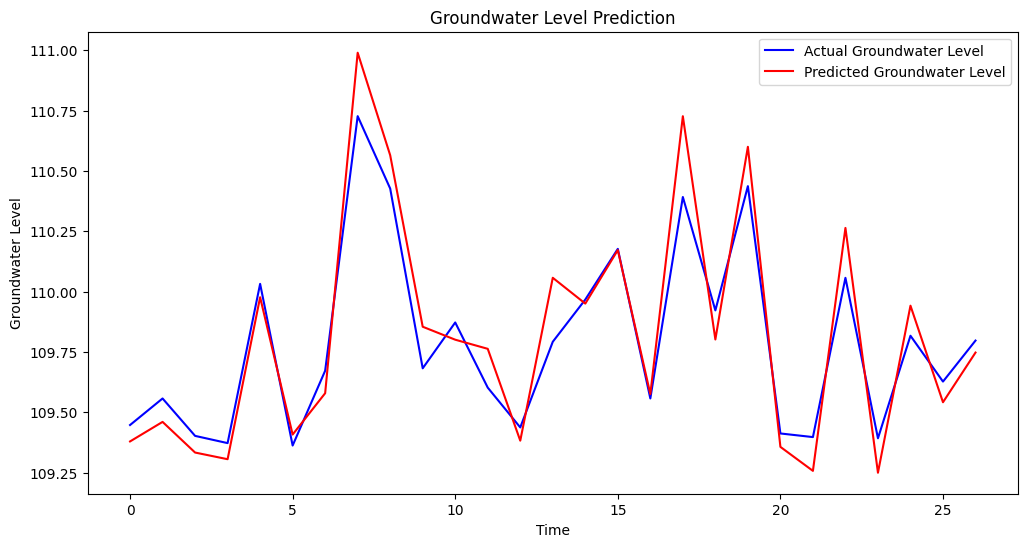

In [17]:

import matplotlib.pyplot as plt

# Plot actual groundwater levels
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Groundwater Level', color='blue')

# Plot predicted groundwater levels
plt.plot(predictions, label='Predicted Groundwater Level', color='red')

plt.xlabel('Time')
plt.ylabel('Groundwater Level')
plt.legend()
plt.title('Groundwater Level Prediction')

plt.show()
